In [5]:
# importing Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [7]:
df = pd.read_csv('advertising.csv')        #HERE PASTE THE FILE PATH
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
df.shape                 # check shape of dataset

(200, 4)

In [9]:
df.isnull().sum()         #Check any null value or not

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.nunique   #check for the unieuqe values for each columns

<bound method DataFrame.nunique of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [11]:
df.describe()        #Find the Stastics of all Columns

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.info()           #Find the Datatype of all Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


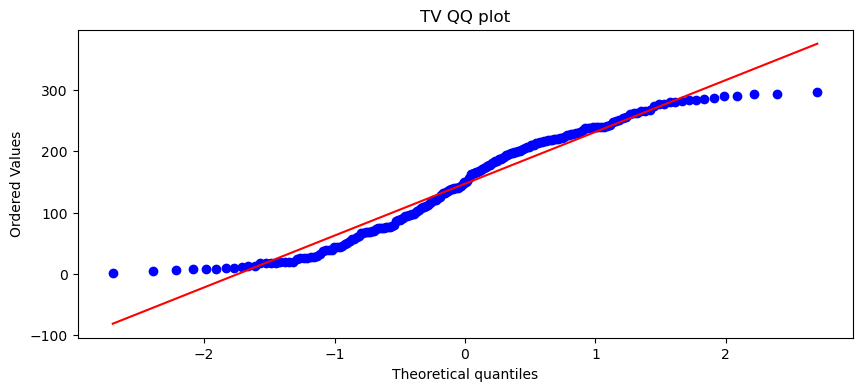

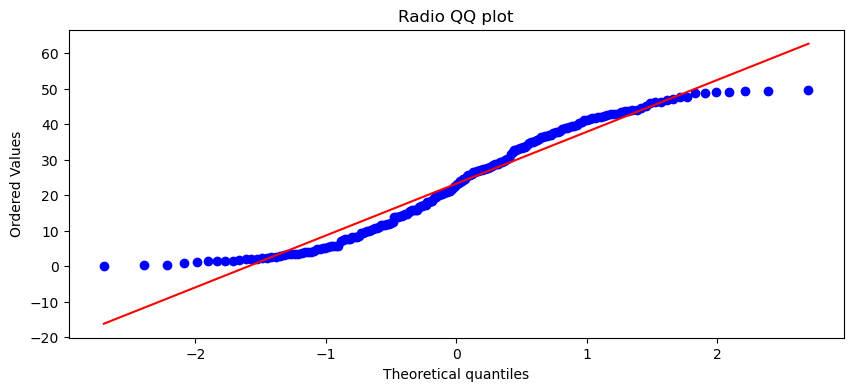

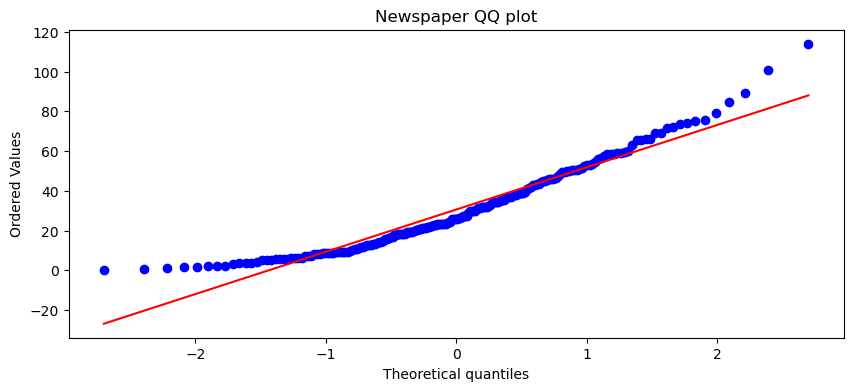

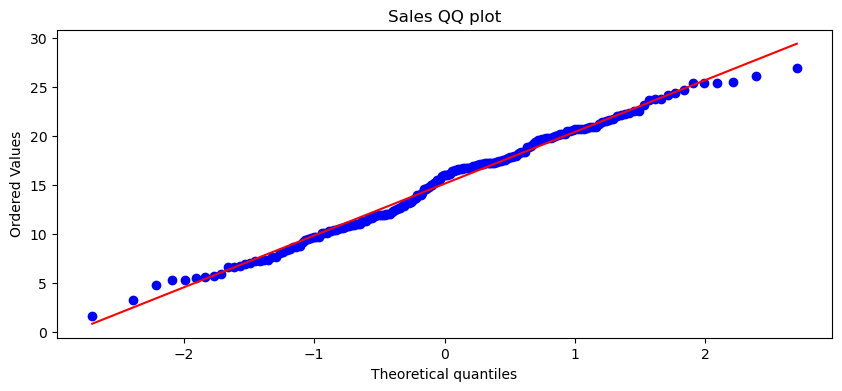

In [13]:
#Check column wise Distribution of Data by the use of QQ plot
for col in df.columns:
    plt.figure(figsize=(10, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col} QQ plot")
    plt.show()


C:\Users\jasmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\jasmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jasmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\jasmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jasmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`

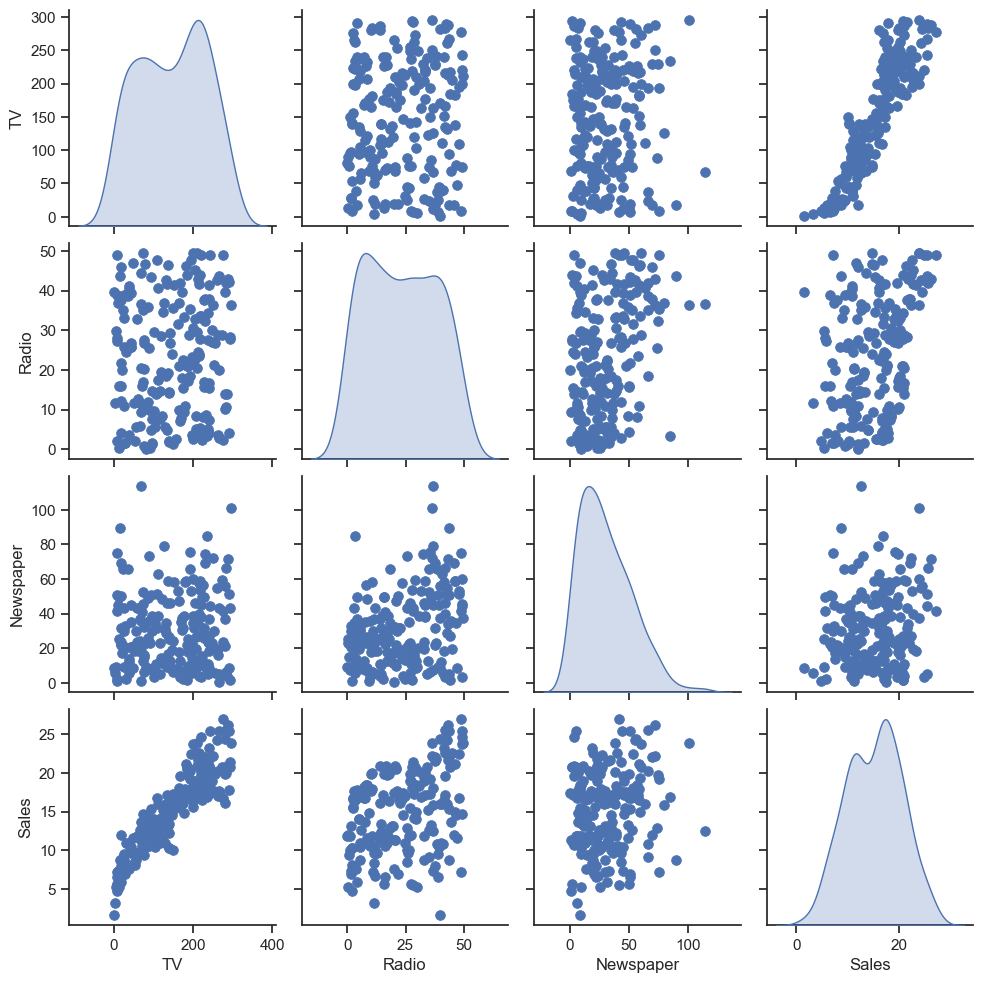

In [14]:
# Pairplot for visualizing relationships between variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, kind="scatter", diag_kind="kde", palette="husl", markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0.5), diag_kws=dict(shade=True))
plt.show()

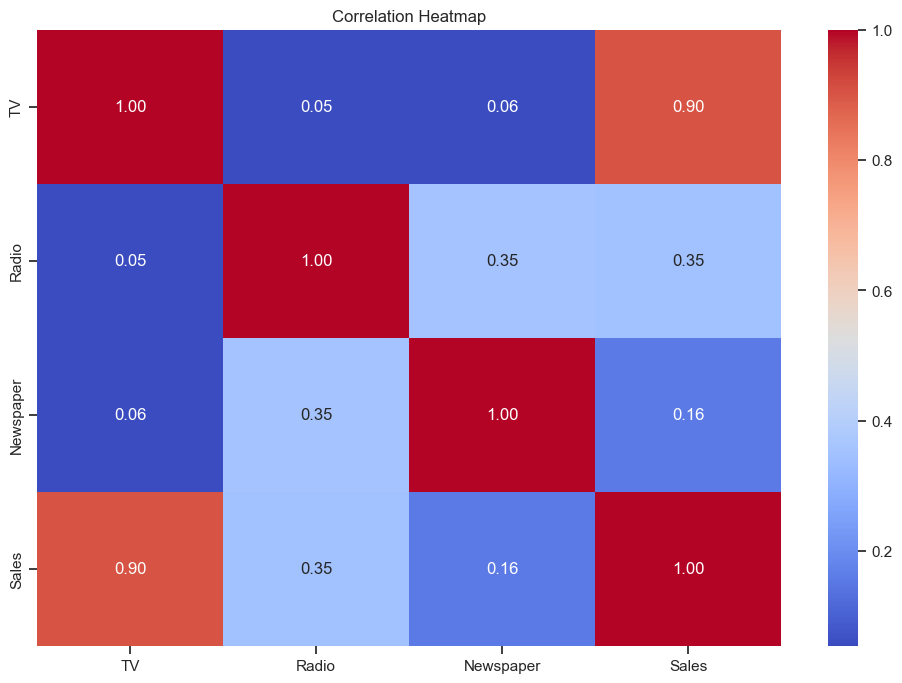

In [15]:
# Correlation heatmap of all Column
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
features = df.drop(columns=['Sales'])
Y_PRE = df[['Sales']]      #Split Independent and Dependent Column into Feature and Target
target = Y_PRE

In [24]:
features

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [25]:
x = features
y = target

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state = 42)     #Split train and test data

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

# Mathematical Transformation

In [30]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
trf=FunctionTransformer(func=np.log1p)       #Used LOG transformer in Mathematical transformaion for all Coloumn

In [32]:
x_train_transformed = trf.fit_transform(x_train)             #Mathematical transformaion fit on Train Data
x_test_transformed = trf.transform(x_test)                   #Mathematical transformaion fit on Test Data

In [33]:
x_train_transformed

,TV,Radio,Newspaper
79,4.762174,2.163323,3.182212
197,5.181784,2.332144,2.001480
38,3.786460,3.321432,3.586293
24,4.147885,2.610070,2.960105
122,5.416100,1.223775,2.809403
...,...,...,...
106,3.258097,2.484907,3.424263
14,5.323498,3.523415,3.850148
92,5.387701,3.540959,4.094345
179,5.115596,2.397895,2.923162


In [36]:
x_train_transformed.isnull().sum()                  #Check any null value or not

TV           0
Radio        0
Newspaper    0
dtype: int64

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression               #apply Linear Regression on Data set
rg_lin=LinearRegression()

rg_lin.fit(x_train_transformed,y_train)
y_pred1 = rg_lin.predict(x_test_transformed)


mae = mean_absolute_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1, squared=False)
r_squared = r2_score(y_test, y_pred1)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 1.697324462355629
Root Mean Squared Error: 2.0163166354474775
R-squared: 0.8684340436300897


In [37]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rg_lin,x_train_transformed,y_train,scoring="r2",cv=10)
np.mean(mse)

0.7798920893175365

In [38]:
# Finding Mean Absolute Error, Mean Squared Error and R-squared Score separately for Train and Test data

rg_linear = LinearRegression()
rg_linear.fit(x_train_transformed, y_train)
y_pred_train = rg_linear.predict(x_train_transformed)
y_pred_test = rg_linear.predict(x_test_transformed)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r_squared_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_test)

print("Linear Regression Metrics:")
print("Training Set - Mean Absolute Error:", mae_train)
print("Training Set - Root Mean Squared Error:", rmse_train)
print("Training Set - R-squared:", r_squared_train)

print("\nTesting Set - Mean Absolute Error:", mae_test)
print("Testing Set - Root Mean Squared Error:", rmse_test)
print("Testing Set - R-squared:", r_squared_test)


Linear Regression Metrics:
Training Set - Mean Absolute Error: 1.685668057756984
Training Set - Root Mean Squared Error: 2.0917787799307903
Training Set - R-squared: 0.8367298294103442

Testing Set - Mean Absolute Error: 1.697324462355629
Testing Set - Root Mean Squared Error: 2.0163166354474775
Testing Set - R-squared: 0.8684340436300897


# Ridge Regression

In [39]:
from sklearn.linear_model import Ridge            #apply Ridge Regression on Data set

rg_ridge = Ridge(alpha=1.0,max_iter=100,solver="saga")      #using OLS
rg_ridge.fit(x_train_transformed, y_train)
y_pred_ridge = rg_ridge.predict(x_test_transformed)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r_squared_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print("Mean Absolute Error:", mae_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R-squared:", r_squared_ridge)


Ridge Regression Metrics:
Mean Absolute Error: 1.6955288284690382
Root Mean Squared Error: 2.017043136092779
R-squared: 0.868339217281618


In [40]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rg_ridge,x_train_transformed,y_train,scoring="r2",cv=10)
np.mean(mse)

0.7798565968138633

In [41]:
# Finding Mean Absolute Error, Mean Squared Error and R-squared Score separately for Train and Test data

reg_ridge = Ridge(alpha=1.0,max_iter=100,solver="saga")
reg_ridge.fit(x_train_transformed, y_train)

y_pred_train = reg_ridge.predict(x_train_transformed)
y_pred_test = reg_ridge.predict(x_test_transformed)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r_squared_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_test)

print("Ridge Regression Metrics:")
print("Training Set - Mean Absolute Error:", mae_train)
print("Training Set - Root Mean Squared Error:", rmse_train)
print("Training Set - R-squared:", r_squared_train)

print("\nTesting Set - Mean Absolute Error:", mae_test)
print("Testing Set - Root Mean Squared Error:", rmse_test)
print("Testing Set - R-squared:", r_squared_test)


Ridge Regression Metrics:
Training Set - Mean Absolute Error: 1.6873729449685304
Training Set - Root Mean Squared Error: 2.0920436832171965
Training Set - R-squared: 0.83668847365722

Testing Set - Mean Absolute Error: 1.6955586372450973
Testing Set - Root Mean Squared Error: 2.0171206878571426
Testing Set - R-squared: 0.868329092835489


# Lasso Regression

In [42]:
from sklearn.linear_model import Lasso                 #apply Lasso Regression on Data set

rg_lasso = Lasso(alpha=0.1)
rg_lasso.fit(x_train_transformed, y_train)
y_pred_lasso = rg_lasso.predict(x_test_transformed)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r_squared_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Absolute Error:", mae_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R-squared:", r_squared_lasso)


Mean Absolute Error: 1.70728793991533
Root Mean Squared Error: 2.040544611801925
R-squared: 0.8652532656522303


In [43]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rg_lasso,x_train_transformed,y_train,scoring="r2",cv=10)
np.mean(mse)

0.7817397663091535

In [44]:
# Finding Mean Absolute Error, Mean Squared Error and R-squared Score separately for Train and Test data

reg_lasso = Lasso(alpha=1.0)
reg_lasso.fit(x_train_transformed, y_train)
y_pred_train = reg_lasso.predict(x_train_transformed)
y_pred_test = reg_lasso.predict(x_test_transformed)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r_squared_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_test)

print("Lasso Regression Metrics:")
print("Training Set - Mean Absolute Error:", mae_train)
print("Training Set - Root Mean Squared Error:", rmse_train)
print("Training Set - R-squared:", r_squared_train)

print("\nTesting Set - Mean Absolute Error:", mae_test)
print("Testing Set - Root Mean Squared Error:", rmse_test)
print("Testing Set - R-squared:", r_squared_test)


Lasso Regression Metrics:
Training Set - Mean Absolute Error: 1.9824399222648985
Training Set - Root Mean Squared Error: 2.5790968604495568
Training Set - R-squared: 0.7517949313170227

Testing Set - Mean Absolute Error: 2.1522392284993495
Testing Set - Root Mean Squared Error: 2.7063997089020964
Testing Set - R-squared: 0.7629663868164773


# Principal Component Analysis (PCA) using Linear Regression

In [45]:
from sklearn.decomposition import PCA            #apply PCA on Data set

In [46]:
pca = PCA(n_components=None)            #Checking number of Dimension in data which best fits in Linear Rigresion Algoritum
x_train_trf=pca.fit_transform(x_train_transformed)
x_test_trf=pca.fit_transform(x_test_transformed)

In [47]:
x_train_trf.shape

(160, 3)

In [48]:
pca.explained_variance_   #variance after performing PCA

array([1.31198677, 0.89199478, 0.72835948])

In [49]:
#CUMILATIVE SUM
np.cumsum(pca.explained_variance_ratio_)

array([0.44741957, 0.75161161, 1.        ])

In [50]:
pca = PCA(n_components=2)                            # performed PCA by setting no. of components as 4
x_train_pca = pca.fit_transform(x_train_transformed)
x_test_pca = pca.transform(x_test_transformed)

clf_lr_pca = LinearRegression()
clf_lr_pca.fit(x_train_pca, y_train)
y_pred_lr_pca = clf_lr_pca.predict(x_test_pca)

y_pred_lr_pca

mae_lr_pca = mean_absolute_error(y_test, y_pred_lr_pca)
rmse_lr_pca = mean_squared_error(y_test, y_pred_lr_pca, squared=False)
r_squared_lr_pca = r2_score(y_test, y_pred_lr_pca)

print("Mean Absolute Error:", mae_lr_pca)
print("Root Mean Squared Error:", rmse_lr_pca)
print("R-squared:", r_squared_lr_pca)


Mean Absolute Error: 1.7687047475177864
Root Mean Squared Error: 2.1736681240913973
R-squared: 0.8470982225975445


In [51]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(clf_lr_pca,x_train_transformed,y_train,scoring="r2",cv=10)
np.mean(mse)

0.7798920893175365

In [53]:
from sklearn.preprocessing import StandardScaler
# Finding Mean Absolute Error, Mean Squared Error and R-squared Score separately for Train and Test data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
pca = PCA(n_components=4)  # Choose the number of principal components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf_linear = LinearRegression()
clf_linear.fit(x_train_pca, y_train)
y_pred_train = clf_linear.predict(x_train_pca)
y_pred_test = clf_linear.predict(x_test_pca)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r_squared_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_test)

print("PCA Regression Metrics:")
print("Training Set - Mean Absolute Error:", mae_train)
print("Training Set - Root Mean Squared Error:", rmse_train)
print("Training Set - R-squared:", r_squared_train)

print("\nTesting Set - Mean Absolute Error:", mae_test)
print("Testing Set - Root Mean Squared Error:", rmse_test)
print("Testing Set - R-squared:", r_squared_test)


PCA Regression Metrics:
Training Set - Mean Absolute Error: 1.3516965324811282e-15
Training Set - Root Mean Squared Error: 2.030524765902695e-15
Training Set - R-squared: 1.0

Testing Set - Mean Absolute Error: 1.7097434579227411e-15
Testing Set - Root Mean Squared Error: 2.476568904370191e-15
Testing Set - R-squared: 1.0
